--- Data Types & Non-Null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare   

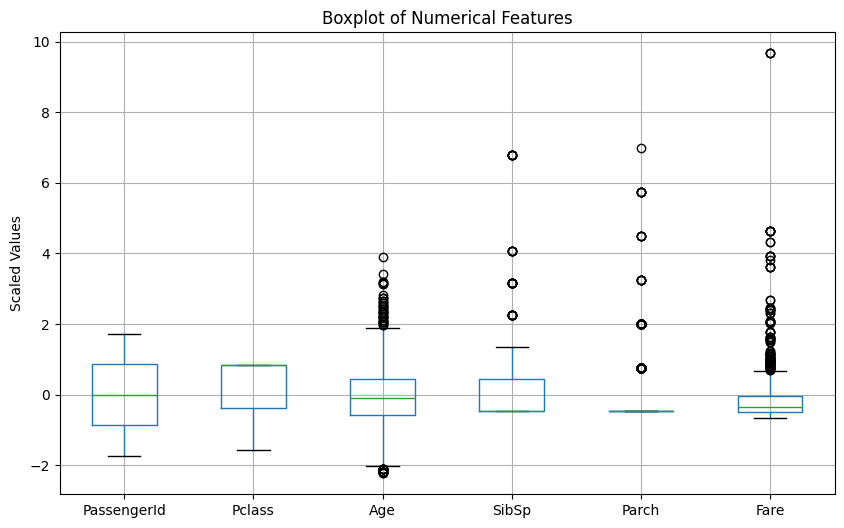


Data shape after outlier removal: (561, 12)


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Titanic-Dataset.csv')
print("--- Data Types & Non-Null Counts ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())

if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])


print("\n--- Missing Values After Imputation ---")
print(df.isnull().sum())


categorical_cols = ['Sex', 'Embarked']
df = pd.get_dummies(df, columns=[c for c in categorical_cols if c in df.columns], drop_first=True)


numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Survived' in numeric_cols:
    numeric_cols.remove('Survived')
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


plt.figure(figsize=(10, 6))
df[numeric_cols].boxplot()
plt.title('Boxplot of Numerical Features')
plt.ylabel('Scaled Values')
plt.show()


for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(f"\nData shape after outlier removal: {df.shape}")


